In [14]:
#1.1 중복이 없는가?

def overlap(data):
    for i in range(len(data)-1):
        for j in range(i+1,len(data)):
            if data[i] == data[j]:
                return(True)
                
    return(False)

In [18]:
overlap("avb c")

False

In [49]:
#1.2 순열확인

def isSY(data1, data2):
    data1 = list(data1)
    data2 = list(data2)
    
    data1.sort()
    data2.sort()
    
    if data1 == data2:
        return(True)
    return(False)

In [52]:
isSY("cac","acc")

True

In [71]:
#1.3 문자열에 들어있는 모든 공백을 '%20'으로 바꾸는 메서드 작성

def strReplace(data):
    strReplace = list()
    for i in range(len(data)):
        if data[i] != " ":
            strReplace.append(data[i])
        else:
            strReplace.append("%20")
            
    return("".join(strReplace))

In [75]:
strReplace("Hello Python dd  ")

'Hello%20Python%20dd%20%20'

In [120]:
#1.4 회문 순열

import numpy as np

def isPalindrome(data):
    
    ascll = np.zeros(128)
    
    for i in range(len(data)):
        ascll[ord(data[i])]+=1
    
    ascll[:65] = 0 #문자열이 아닌 부분은 0으로 
    ascll[91:97] = 0
    ascll[123:] = 0

    len_data = np.count_nonzero(ascll)
    
    cnt = 0
    for j in range(len(ascll)): #짝수개가 아닌 문자열 갯수
        if ascll[j]%2 != 0:
            cnt += 1

    if sum(ascll) % 2 != 0: #홀수개일때
        if cnt > 2:
            return(False)
    else:
        if cnt != 0:
            return(False)
    
    return(True)

In [126]:
data = "ab abcd"
isPalindrome(data)

False

In [150]:
#1.5 하나빼기

def oneEditAway(data1, data2):
    data1 = list(data1)
    data2 = list(data2)
    
    data1.sort()
    data2.sort()
    
    data1_len = len(data1)
    data2_len = len(data2)
    
    if abs(data1_len-data2_len)>1: #문자열 길이가 1 보다 차이나면 false
        return(False)
    
    cnt = 0
    
    #두 문자열 길이가 다를 때
    if data1_len != data2_len: 
        length = data1_len if (data1_len<=data2_len) else data2_len
        for i in range(length):
            try:
                data2.index(data1[i]) #data1의 i 번째 문자열이 data2에 없으면 에러! -> cnt+1
            except ValueError:
                cnt +=1
    
    #두 문자열 길이가 같을 때
    else: 
        for i in range(data1_len):
            try:
                data2.index(data1[i])
            except ValueError:
                cnt +=1
                
                
    if cnt>1:
        return(False)
    
    return(True)
    

In [152]:
data1 = "pale"
data2 = "bake"
oneEditAway(data1, data2)

False

In [213]:
#1.6 문자열 압축

def compress(data):
    result = list()
    index = 0
    cnt = 1
    result.append(data[index])
    
    if len(data)==1: #data길이가 1일때 
        result.append(data)
        result.append("1")
    
    while index < len(data)-1:  
        if data[index] == data[index+1]: #다음 index와 비교
            cnt += 1
        else:
            result.append(str(cnt))
            result.append(data[index+1])
            cnt = 1   

        if index == len(data)-2:
            result.append(str(cnt))
        index += 1

    _result = "".join(result)
    
    if len(data)<len(_result):
        return(data)
    else:
        return(_result)

In [215]:
data = "a"
compress(data)

'a'

In [237]:
#1.7 행렬 회전

def ratation(data):
    result = np.zeros_like((data))
    _data = np.flip(data,axis=0)
    
    for i in range(result.shape[0]):
        result[i,:] = _data[:,i]
    
    return(result)

In [239]:
data = np.array([[11,12,13,14],[21,22,23,24],[31,32,33,34],[41,42,43,44]])
ratation(data)

array([[41, 31, 21, 11],
       [42, 32, 22, 12],
       [43, 33, 23, 13],
       [44, 34, 24, 14]])

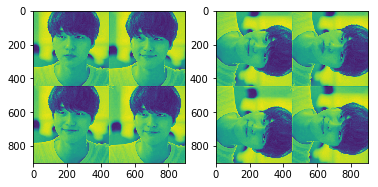

In [257]:
##이미지 회전 확인

import cv2
import matplotlib.pyplot as plt

_image = cv2.imread("IMG_4578.jpg")
image = cv2.cvtColor(_image, cv2.COLOR_BGR2GRAY)

#image.shape
result = ratation(image)

plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(result)

plt.show()

In [284]:
#1.8 0행렬

def setZeros(data):
    zeroIndex = np.where(data==0)[0]
    
    if len(zeroIndex)==0:
        return(data)
    else:
        _zeroIndex = np.where(data==0)
        
        data[_zeroIndex[0][0],:] = 0
        data[:,_zeroIndex[1][0]] = 0

    return(data)

In [286]:
data = np.array([[11,12,0,14],[21,22,23,24],[31,32,33,34],[41,42,43,44]])
setZeros(data)

array([[ 0,  0,  0,  0],
       [21, 22,  0, 24],
       [31, 32,  0, 34],
       [41, 42,  0, 44]])

In [294]:
#1.9 문자열 회전

def isRotation(data1,data2):
    index = data1.index(data2[0])
    _data1 = data1[3:]+data1[:3]
    
    if _data1==data2:
        return(True)
    
    return(False)


def isRotation2(data1,data2):
    _data1 = data1+data1
    if _data1.find(data2)>0:
        return(True)
    return(False)

In [309]:
data1 = "waterbottle"
data2 = "erbottlewat"
isRotation(data1,data2)
isRotation2(data1,data2)

True